## **Short Summary of Results for Assignment2**

# **Cross Validation**

1. Here, I applied 5-fold, 3-fold and 10-fold cross-validation. Here I checked which K-fold cross validation among those three give the lowest mean squared error or has the best model performance. We observed that 5-fold CV gives the least mse 0.117673 which in turn gives the best model performance.

# **Bootstrap**

1. Here we ran bootstrap over-sampling to balance the previously imbalanced dataset. And model sensitivity (Sensitivity is calculated as the number of correct positive predictions divided by the total number of positives) has increased dramatically from 0.20% to 13% approximately than before after applying bootstrap with the cost of accuracy, here model accuracy is 63%. Though by this our accuracy dropped to 63% but our true postive to false negative ratio has much improved which is now 496:298, before which  was 1:108. 

# **From Assignment 02**

**Here, I am importing the predictor dataset file fromw assignment03 which I created after the feature selction in assignment03 which has the predictor variables and response variable as well.**

In [ ]:
import pandas as pd

df=pd.read_csv('As2_train_test_data.csv')
# df_predict1=df.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','age','job','campaign', 'poutcome', 'y', 'y_new'])


print(df)
df_predict1=df.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','age','job','campaign', 'poutcome', 'y', 'y_new'])

# putting dummy variables in categorical columns
education_dummies = pd.get_dummies(df_predict1.education, prefix="education")
df_with_dummies = pd.concat([df_predict1,education_dummies],axis='columns')
df_with_dummies.drop('education',axis='columns',inplace=True)
marital_dummies = pd.get_dummies(df_with_dummies.marital, prefix="marital")
df_with_dummies1 = pd.concat([df_with_dummies,marital_dummies],axis='columns')
df_with_dummies1.drop('marital',axis='columns',inplace=True)
housing_dummies = pd.get_dummies(df_with_dummies1.housing, prefix="housing")
df_with_dummies2 = pd.concat([df_with_dummies1,housing_dummies],axis='columns')
df_with_dummies2.drop('housing',axis='columns',inplace=True)
loan_dummies = pd.get_dummies(df_with_dummies2.loan, prefix="loan")
df_with_dummies3 = pd.concat([df_with_dummies2,loan_dummies],axis='columns')
df_with_dummies3.drop('loan',axis='columns',inplace=True)
df_with_dummies3 = df_with_dummies3.astype(float)
df_with_dummies3.dtypes

       age            job  marital  education  ... previous  poutcome   y y_new
0     30.0     unemployed  married    primary  ...      0.0   unknown  no   0.0
1     33.0       services  married  secondary  ...      4.0   failure  no   0.0
2     35.0     management   single   tertiary  ...      1.0   failure  no   0.0
3     30.0     management  married   tertiary  ...      0.0   unknown  no   0.0
4     59.0    blue-collar  married  secondary  ...      0.0   unknown  no   0.0
...    ...            ...      ...        ...  ...      ...       ...  ..   ...
4329  33.0       services  married  secondary  ...      0.0   unknown  no   0.0
4330  57.0  self-employed  married   tertiary  ...      0.0   unknown  no   0.0
4331  57.0     technician  married  secondary  ...      0.0   unknown  no   0.0
4332  28.0    blue-collar  married  secondary  ...      3.0     other  no   0.0
4333  44.0   entrepreneur   single   tertiary  ...      7.0     other  no   0.0

[4334 rows x 18 columns]


previous               float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
marital_divorced       float64
marital_married        float64
marital_single         float64
housing_no             float64
housing_yes            float64
loan_no                float64
loan_yes               float64
dtype: object

# **Cross Validation**
Before, I worked on using 80% of our data for training and 20% for testing in logistic regression model. Cross validation makes us run our single model on various training/validation combinations and gives us a lot more confidence in our final metrics. Here, I applied 5-fold, 3-fold and 10-fold cross-validation. Each time we run the model, a different 80% of the data will be used for training, and a different 20% will be used for validation. And we can do this in such a manner that all of the data will be used in only one of the validation sets. This ensures that every point is used for validation exactly one time.  


In [ ]:
X = df_with_dummies3
X

,previous,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4329,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4330,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4331,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4332,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y1 = df.y_new
y1

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4329    0.0
4330    0.0
4331    0.0
4332    0.0
4333    0.0
Name: y_new, Length: 4334, dtype: float64

**Applying k-fold cross validation on my logistic regression model**


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1,train_size=0.8)

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.8858131487889274

# cross_val_score function
Scikit-learn's cross_val_score() method requires four parameters. First, we have the estimator or the specific model that we want to use, here, I used logistic regression. Next, we use X to specify the complete training dataset and y to specify the response values. Lastly, the parameter cv allows us to specify the number of cross-validation splits (or folds). Here, I applied 5-fold, 3-fold and 10-fold cross-validation. By default, cross_val_score() will use a default scoring function for whichever model have been specified. For most regression models, it will return the R-squared value.

In [ ]:
from sklearn.model_selection import cross_val_score
# Load the mean squared error method
# Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer

**Logistic regression model performance using cross_val_score**

In [ ]:
l_scores=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X,y1,cv=5, scoring=make_scorer(mean_squared_error))
# print(l_scores)
# np.average(l_scores)
# Print the mean error
print(l_scores.mean())

0.11767396267024673


Now I have a baseline score to build on. If I decide to build additional models or try new techniques, I should try to get an error lower than 0.11767396267024673. Lower errors indicate that my term deposit predictions are improving.

In [ ]:
l_scores=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X,y1,cv=3, scoring=make_scorer(mean_squared_error))
# print(l_scores)
# np.average(l_scores)
# Print the mean error
print(l_scores.mean())

0.11767453600309279


5-fold CV gave lower errors than 3-fold

In [ ]:
l_scores=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X,y1,cv=10, scoring=make_scorer(mean_squared_error))

# Print the mean error
print(l_scores.mean())

0.11790476899990424


5-fold CV gave lower errors than 10-fold

## **Bootstraping**

As we observed in the assignment02 that the dataset is imbalanced with a heavy bias towards 'no' in the response variable. Using Bootstrap over sampling method we can make the imbalanced dataset balanced


**First we are creating our training and tset dataframe all over again**

In [ ]:
import pandas as pd

df=pd.read_csv('As2_train_test_data.csv')
# df_predict1=df.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','age','job','campaign', 'poutcome', 'y', 'y_new'])

df_predict1=df.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','job','campaign', 'poutcome', 'y', 'y_new'])

# putting dummy variables in categorical columns
education_dummies = pd.get_dummies(df_predict1.education, prefix="education")
df_with_dummies = pd.concat([df_predict1,education_dummies],axis='columns')
df_with_dummies.drop('education',axis='columns',inplace=True)
marital_dummies = pd.get_dummies(df_with_dummies.marital, prefix="marital")
df_with_dummies1 = pd.concat([df_with_dummies,marital_dummies],axis='columns')
df_with_dummies1.drop('marital',axis='columns',inplace=True)
housing_dummies = pd.get_dummies(df_with_dummies1.housing, prefix="housing")
df_with_dummies2 = pd.concat([df_with_dummies1,housing_dummies],axis='columns')
df_with_dummies2.drop('housing',axis='columns',inplace=True)
loan_dummies = pd.get_dummies(df_with_dummies2.loan, prefix="loan")
df_with_dummies3 = pd.concat([df_with_dummies2,loan_dummies],axis='columns')
df_with_dummies3.drop('loan',axis='columns',inplace=True)
df_with_dummies3 = df_with_dummies3.astype(float)
df_with_dummies3.dtypes

age                    float64
previous               float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
marital_divorced       float64
marital_married        float64
marital_single         float64
housing_no             float64
housing_yes            float64
loan_no                float64
loan_yes               float64
dtype: object

In [ ]:
X = df_with_dummies3
X

,age,previous,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,30.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,33.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,35.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,30.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,59.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4330,57.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4331,57.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4332,28.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y1 = df.y_new
y1

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4329    0.0
4330    0.0
4331    0.0
4332    0.0
4333    0.0
Name: y_new, Length: 4334, dtype: float64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X, y1)


In [ ]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7664 non-null   float64
 1   previous             7664 non-null   float64
 2   education_primary    7664 non-null   float64
 3   education_secondary  7664 non-null   float64
 4   education_tertiary   7664 non-null   float64
 5   marital_divorced     7664 non-null   float64
 6   marital_married      7664 non-null   float64
 7   marital_single       7664 non-null   float64
 8   housing_no           7664 non-null   float64
 9   housing_yes          7664 non-null   float64
 10  loan_no              7664 non-null   float64
 11  loan_yes             7664 non-null   float64
dtypes: float64(12)
memory usage: 718.6 KB


In [ ]:
y_resampled.describe

<bound method NDFrame.describe of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7659    1.0
7660    1.0
7661    1.0
7662    1.0
7663    1.0
Name: y_new, Length: 7664, dtype: float64>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


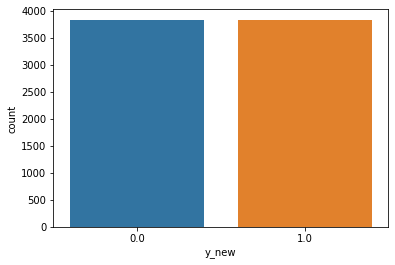

In [ ]:
import seaborn as sns
sns.countplot(y_resampled)

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,train_size=0.8)

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_resampled_train, y_resampled_train)

LogisticRegression()

In [ ]:
model.predict(X_resampled_test)

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_resampled_predicted = model.predict(X_resampled_test)

In [ ]:
model.score(X_resampled_test,y_resampled_test)

0.6366601435094585

## **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm_bootstrap = confusion_matrix(y_resampled_test, y_resampled_predicted)
cm_bootstrap

array([[480, 259],
       [298, 496]])

Text(69.0, 0.5, 'Truth')

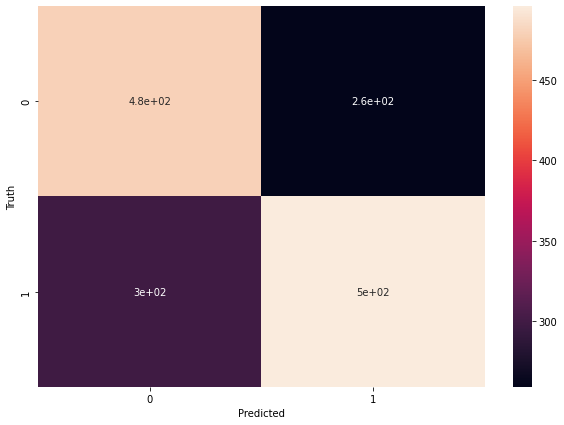

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_bootstrap, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the confusion matrix heatmap above we can observe that the true postive to false negative 496:298 which is much improved than the original confusion matrix where the ratio was 1:108. Sensitivity (SN) is calculated as the number of correct positive predictions divided by the total number of positives. And here our model sensitivity has increased dramatically than before after applying bootstrap with the cost of accuracy.

In [ ]:
def draw_bs_pairs_logreg(x, y, size=1):
    """Perform pairs bootstrap for logistic regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.01490832 0.03178785]


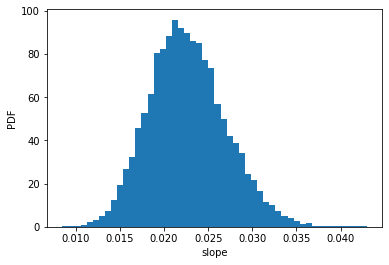

In [ ]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_logreg(
                    X.previous, y1, size=10000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True, stacked=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

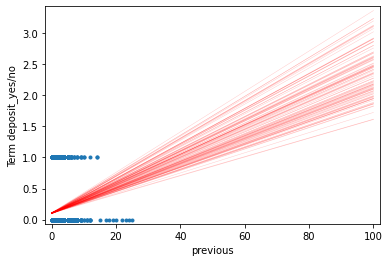

In [ ]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(X.previous, y1, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('previous')
_ = plt.ylabel('Term deposit_yes/no')
plt.margins(0.02)
plt.show()

[0.01814126 0.06149704]


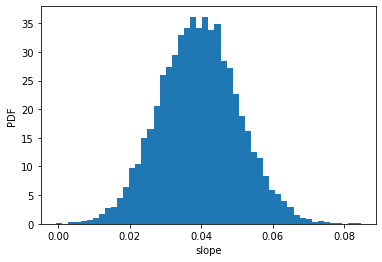

In [ ]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_logreg(
                    X.education_tertiary, y1, size=10000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True, stacked=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

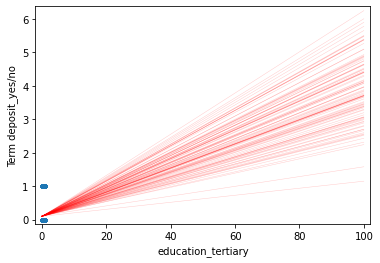

In [ ]:
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(X.education_tertiary, y1, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('education_tertiary')
_ = plt.ylabel('Term deposit_yes/no')
plt.margins(0.02)
plt.show()

[0.00280119 0.06783408]


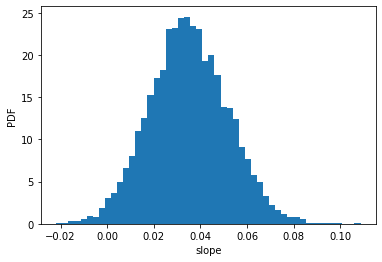

In [ ]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_logreg(
                    X.marital_divorced, y1, size=10000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True, stacked=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

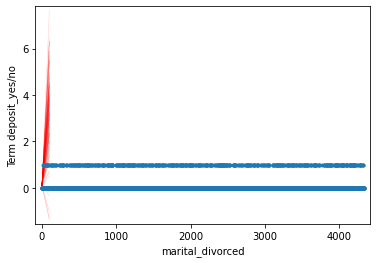

In [ ]:
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(X.marital_divorced, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('marital_divorced')
_ = plt.ylabel('Term deposit_yes/no')
plt.margins(0.02)
plt.show()

In [ ]:
import pandas as pd
df1 = pd.read_excel ('MBA6636_SM21_Professor_Proposes_Data.xlsx')
print (df1)

     Carat Colour Clarity Cut Certification Polish Symmetry  Price  Wholesaler
0     0.92      I     SI2   G           AGS      V        V   3000           1
1     0.92      I     SI2   V           AGS      G        G   3000           1
2     0.82      F     SI2   I           GIA      X        X   3004           1
3     0.81      G     SI1   I           GIA      X        V   3004           1
4     0.90      J     VS2   V           GIA      V        V   3006           1
..     ...    ...     ...  ..           ...    ...      ...    ...         ...
435   0.30      K    VVS1   V           GIA      X        V    547           3
436   0.30      H     SI1   G           GIA      V        V    559           3
437   0.30      H     SI1   X           GIA      V        V    559           3
438   0.30      H     SI1   V           GIA      X        X    559           3
439   0.30      H     SI1   X           GIA      V        X    559           3

[440 rows x 9 columns]


In [ ]:
df1["Clarity"].replace({"I1": "1", "I2": "2", "SI1": "3", "SI2": "4", "SI3": "5", "VS1": "6", "VS2": "7", "VVS1": "8", "VVS2": "9"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,I,4,G,AGS,V,V,3000,1
1,0.92,I,4,V,AGS,G,G,3000,1
2,0.82,F,4,I,GIA,X,X,3004,1
3,0.81,G,3,I,GIA,X,V,3004,1
4,0.90,J,7,V,GIA,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,K,8,V,GIA,X,V,547,3
436,0.30,H,3,G,GIA,V,V,559,3
437,0.30,H,3,X,GIA,V,V,559,3
438,0.30,H,3,V,GIA,X,X,559,3


In [ ]:
df1["Colour"].replace({"D": "2", "E": "2", "F": "2", "G": "2", "H": "2", "I": "2", "J": "1", "K": "1", "L": "1"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,G,AGS,V,V,3000,1
1,0.92,2,4,V,AGS,G,G,3000,1
2,0.82,2,4,I,GIA,X,X,3004,1
3,0.81,2,3,I,GIA,X,V,3004,1
4,0.90,1,7,V,GIA,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,V,GIA,X,V,547,3
436,0.30,2,3,G,GIA,V,V,559,3
437,0.30,2,3,X,GIA,V,V,559,3
438,0.30,2,3,V,GIA,X,X,559,3


In [ ]:
df1["Certification"].replace({"AGS": "2", "GIA": "2", "IGI": "1", "EGL": "1","DOW": "1" }, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,G,2,V,V,3000,1
1,0.92,2,4,V,2,G,G,3000,1
2,0.82,2,4,I,2,X,X,3004,1
3,0.81,2,3,I,2,X,V,3004,1
4,0.90,1,7,V,2,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,V,2,X,V,547,3
436,0.30,2,3,G,2,V,V,559,3
437,0.30,2,3,X,2,V,V,559,3
438,0.30,2,3,V,2,X,X,559,3


In [ ]:
df1["Cut"].replace({"F": "1", "G": "1", "V": "2", "X": "2", "I": "2"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,V,V,3000,1
1,0.92,2,4,2,2,G,G,3000,1
2,0.82,2,4,2,2,X,X,3004,1
3,0.81,2,3,2,2,X,V,3004,1
4,0.90,1,7,2,2,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,X,V,547,3
436,0.30,2,3,1,2,V,V,559,3
437,0.30,2,3,2,2,V,V,559,3
438,0.30,2,3,2,2,X,X,559,3


In [ ]:
df1["Polish"].replace({"F": "1", "G": "1", "V": "2", "X": "2", "I": "2", "v": "2"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,2,V,3000,1
1,0.92,2,4,2,2,1,G,3000,1
2,0.82,2,4,2,2,2,X,3004,1
3,0.81,2,3,2,2,2,V,3004,1
4,0.90,1,7,2,2,2,V,3006,1
5,0.87,2,4,2,2,1,V,3007,1
6,0.80,2,4,2,2,2,V,3008,1
7,0.84,2,3,1,2,2,V,3010,1
8,0.80,2,4,2,2,2,V,3012,1
9,0.80,2,4,2,2,2,X,3012,1


In [ ]:
df_as1=df1.drop(columns=['Symmetry'])
df_as1

,Carat,Colour,Clarity,Cut,Certification,Polish,Price,Wholesaler
0,0.92,2,4,1,2,2,3000,1
1,0.92,2,4,2,2,1,3000,1
2,0.82,2,4,2,2,2,3004,1
3,0.81,2,3,2,2,2,3004,1
4,0.90,1,7,2,2,2,3006,1
5,0.87,2,4,2,2,1,3007,1
6,0.80,2,4,2,2,2,3008,1
7,0.84,2,3,1,2,2,3010,1
8,0.80,2,4,2,2,2,3012,1
9,0.80,2,4,2,2,2,3012,1


In [ ]:
df_highprice = df_as1[df_as1['Wholesaler'] < 3]
print (df_highprice)

df_lowprice = df_as1[df_as1['Wholesaler'] > 2]
print (df_lowprice)
df_highprice1=df_highprice.drop(columns=['Wholesaler'])
df_lowprice1=df_lowprice.drop(columns=['Wholesaler'])
print (df_highprice1)
print (df_lowprice1)

     Carat Colour Clarity Cut Certification Polish  Price  Wholesaler
0     0.92      2       4   1             2      2   3000           1
1     0.92      2       4   2             2      1   3000           1
2     0.82      2       4   2             2      2   3004           1
3     0.81      2       3   2             2      2   3004           1
4     0.90      1       7   2             2      2   3006           1
5     0.87      2       4   2             2      1   3007           1
6     0.80      2       4   2             2      2   3008           1
7     0.84      2       3   1             2      2   3010           1
8     0.80      2       4   2             2      2   3012           1
9     0.80      2       4   2             2      2   3012           1
10    0.85      2       4   2             2      2   3014           1
11    0.83      2       4   2             2      2   3014           1
12    0.82      2       6   1             2      1   3015           1
13    0.82      2   

In [ ]:
df_highprice2 = df_highprice1.rename(columns={'Colour': 'Colour2C', 'Cut': 'Cut2C', 'Certification': 'Cert2G', 'Clarity': 'ClarityIS', 'Polish': 'Polish2C'})
df_highprice2

,Carat,Colour2C,ClarityIS,Cut2C,Cert2G,Polish2C,Price
0,0.92,2,4,1,2,2,3000
1,0.92,2,4,2,2,1,3000
2,0.82,2,4,2,2,2,3004
3,0.81,2,3,2,2,2,3004
4,0.90,1,7,2,2,2,3006
5,0.87,2,4,2,2,1,3007
6,0.80,2,4,2,2,2,3008
7,0.84,2,3,1,2,2,3010
8,0.80,2,4,2,2,2,3012
9,0.80,2,4,2,2,2,3012


In [ ]:
df_lowprice2 = df_lowprice1.rename(columns={'Colour': 'Colour2C', 'Cut': 'Cut2C', 'Certification': 'Cert2G', 'Clarity': 'ClarityIS', 'Polish': 'Polish2C'})
df_lowprice2

,Carat,Colour2C,ClarityIS,Cut2C,Cert2G,Polish2C,Price
240,0.09,2,3,2,1,1,190
241,0.09,2,3,2,1,1,160
242,0.09,2,3,2,1,2,160
243,0.09,2,3,2,1,1,180
244,0.09,2,6,2,1,2,190
245,0.10,2,7,2,1,2,330
246,0.10,2,6,2,1,1,180
247,0.10,2,7,2,1,1,180
248,0.10,2,7,2,1,2,180
249,0.10,2,3,2,1,1,190


In [ ]:
df_lowprice2.to_csv(r'As1_train_test_data_lowprice.csv', index = False)
df_highprice2.to_csv(r'As1_train_test_data_highprice.csv', index = False)


## **From Assignment 01**

Here, I am importing the two predictor datasets which has the predictor variables and response variable as well. The predictor datasets are for high priced diamonds and low priced diamonds. The datasets were found after extensive EDA in assignment 01. The predictor variables here are Carat, Colour2C, ClarityIS, Cut2C, Cert2G and Polish2C.

In [ ]:

df_price_low=pd.read_csv('As1_train_test_data_lowprice.csv')
df_price_high=pd.read_csv('As1_train_test_data_highprice.csv')
print(df_price_low)
print(df_price_high)
# df_price_low.dtypes
# df_price_high.dtypes

     Carat  Colour2C  ClarityIS  Cut2C  Cert2G  Polish2C  Price
0     0.09         2          3      2       1         1    190
1     0.09         2          3      2       1         1    160
2     0.09         2          3      2       1         2    160
3     0.09         2          3      2       1         1    180
4     0.09         2          6      2       1         2    190
5     0.10         2          7      2       1         2    330
6     0.10         2          6      2       1         1    180
7     0.10         2          7      2       1         1    180
8     0.10         2          7      2       1         2    180
9     0.10         2          3      2       1         1    190
10    0.10         2          3      2       1         1    160
11    0.10         2          3      2       1         1    160
12    0.10         2          4      1       1         2    190
13    0.10         2          6      2       1         1    180
14    0.10         2          6      2  

In [ ]:
# making the data types of the dataframes float types
df_price_low = df_price_low.astype(float)
df_price_high = df_price_high.astype(float)

print(df_price_low)
print(df_price_high)

     Carat  Colour2C  ClarityIS  Cut2C  Cert2G  Polish2C  Price
0     0.09       2.0        3.0    2.0     1.0       1.0  190.0
1     0.09       2.0        3.0    2.0     1.0       1.0  160.0
2     0.09       2.0        3.0    2.0     1.0       2.0  160.0
3     0.09       2.0        3.0    2.0     1.0       1.0  180.0
4     0.09       2.0        6.0    2.0     1.0       2.0  190.0
5     0.10       2.0        7.0    2.0     1.0       2.0  330.0
6     0.10       2.0        6.0    2.0     1.0       1.0  180.0
7     0.10       2.0        7.0    2.0     1.0       1.0  180.0
8     0.10       2.0        7.0    2.0     1.0       2.0  180.0
9     0.10       2.0        3.0    2.0     1.0       1.0  190.0
10    0.10       2.0        3.0    2.0     1.0       1.0  160.0
11    0.10       2.0        3.0    2.0     1.0       1.0  160.0
12    0.10       2.0        4.0    1.0     1.0       2.0  190.0
13    0.10       2.0        6.0    2.0     1.0       1.0  180.0
14    0.10       2.0        6.0    2.0  